In [ ]:
import sys

assert sys.version_info >= (3, 7)

In [ ]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [ ]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
import numpy as np

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector | y = 4 + 3x + noise

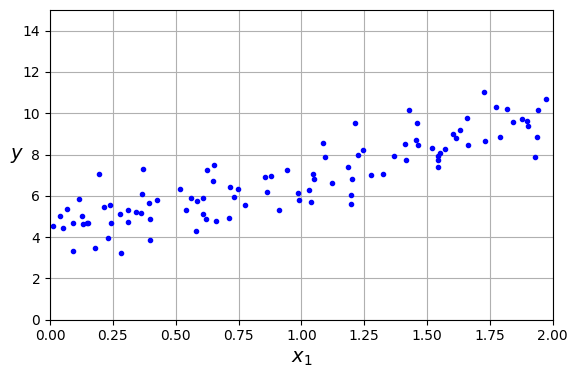

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("generated_data_plot")
plt.show()

We want to see how well our model will fit the training data. To do this, we'll use a mean squared error to measure our performance/loss. As we want to minimize the $\theta$ in our MSE, we'll use the normal equation. Recall that
$$MSE(X,h_{\theta}) = \frac{1}{m}\sum_{i=1}^m (\theta^T x^{(i)} - y^{(i)})^2$$
and the normal equation (the $\theta$ that minimizes $MSE(X,h_{\theta})$) is
$$\hat{\theta} = (X^T X)^{-1}X^T y$$
where, $\hat{\theta}$ is the value of $\theta$ that minimizes the cost function, y is the vector of target values containing $y^{(1)}$ to $y^{(m)}$



In [ ]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.21509616],
       [2.77011339]])

Recall that our function is $y=4 + 3x_1 + $noise.  We should have got $b = 4, a = 3$, but instead we got $b_\theta = 4.215, a_\theta = 2.770$. Why were we off? The noise made it impossible to get the exact parameters. Nonetheless, we can still use our $\hat{\theta}$ to make predictions. We will test it with $x=0,2$

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

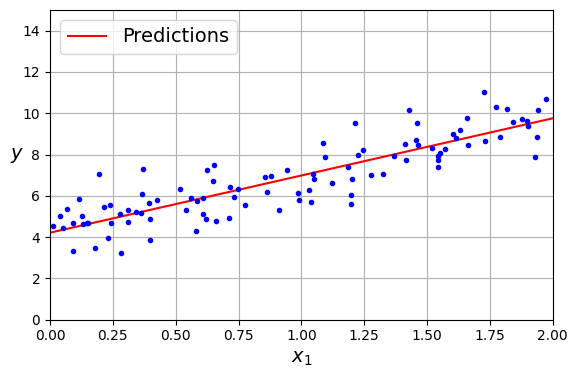

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
save_fig("linear_model_predictions_plot")

plt.show()

We can also use scikit-learn to perform linear regression. Notice how the predictions it gives for 0 and 2 matches ours from above.

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

which we could have also found directly with

In [ ]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

What's the computational complexity of all this? Finding the normal equation is essentially getting the inverse of $X^T X$, which is an $(n+1) \times (n+1)$ matrix (when you have n features), so at worst it's $O(n^3)$. There's definitely faster ways like we could use singular value decomposition which I think is $O(n^2)$. I gotta look into scikit-learn's linear regression class to see how to do that because if we have a large number of features, the change would be worthwhile.

On the bright side, once we've trained the model, the predictions will be really fast! Probably linear with regard to the number of features/instances we want to predict.

There's other ways too to train a linear regression model which might be better suited for a large number of features/too many training instances:

*   Gradient Descent - tweaking parameters iteratively in order to minimize our cost function
*   Batch Gradient Descent - i don't really know what it is but i think it uses the whole training set to compute gradients at each step so it's probably slow as hell
* Stochastic Gradient Descent - picks a random instance in the training set at every step and computes gradients based only on that one instance. The problem is this might be a lot less regular like instead of gradually decreasing the cost function, it'll probably bounce around a lot only decreasing on average
* Mini - batch gradient descent - computes gradients on small random sets of instances called mini-batches



If our data is nonlinear, we could also use polynomial regression. I know Scikit-Learn has a PolynoialFeatures class. Let's first make sure we get linear regression working as a baseline then we can build off there. We can also check out some other models like ridge regression, lasso regression, elastic net regression, softmax regression (I don't know what any of those are and I'd have to research them).

Ok. Now our linear regression model is clearly going to be a lot more complicated with a lot more features, so here's a test run with 8 features.

In [ ]:
np.random.seed(42)

# Generate random input features
m = 3000  # number of instances
x = 2 * np.random.rand(m, 1)
w = 2 * np.random.rand(m, 1)
y_feature = 2 * np.random.rand(m, 1)
z = 2 * np.random.rand(m, 1)
a = 2 * np.random.rand(m, 1)
b = 2 * np.random.rand(m, 1)
c = 2 * np.random.rand(m, 1)
d = 2 * np.random.rand(m, 1)

y = 4 + 3*x + 2*w + 5*y_feature + 9*z + 14*a + 34*b + 3*c + d + np.random.randn(m, 1)


X = np.hstack([x, w, y_feature, z, a, b, c, d]) # turns our column vectors into horizontal ones

lin_reg = LinearRegression() # creates object
lin_reg.fit(X, y) # trains model
print("Intercept:", lin_reg.intercept_)
print("Coefficients:", lin_reg.coef_)

Intercept: [4.00791246]
Coefficients: [[ 3.04334012  1.95443564  5.05821505  8.99164802 13.9546798  34.01204041
   2.99465971  0.98782865]]


Ok great. Let's see how far off we were by calculating the errors and plotting them

Absolute Errors: [0.04334012 0.04556436 0.05821505 0.00835198 0.0453202  0.01204041
 0.00534029 0.01217135]
Relative Errors (%): [1.4446707  2.27821817 1.16430102 0.09279972 0.32371568 0.03541297
 0.17800963 1.2171348 ]


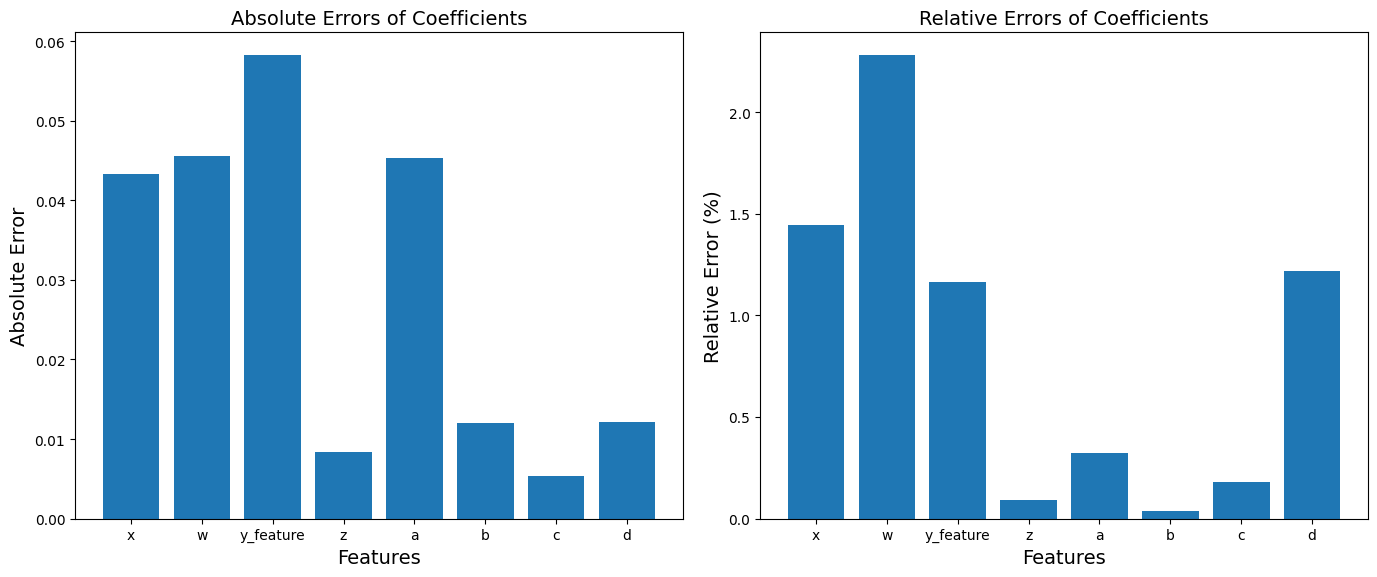

In [ ]:
true_coefficients = np.array([3, 2, 5, 9, 14, 34, 3, 1])
estimated_coefficients = lin_reg.coef_.flatten()

absolute_errors = np.abs(true_coefficients - estimated_coefficients)
relative_errors = (absolute_errors / true_coefficients) * 100
print("Absolute Errors:", absolute_errors)
print("Relative Errors (%):", relative_errors)

feature_names = ['x', 'w', 'y_feature', 'z', 'a', 'b', 'c', 'd']
plt.figure(figsize=(14, 6))

# absolute error plot
plt.subplot(1, 2, 1)
plt.bar(feature_names, absolute_errors)
plt.xlabel('Features')
plt.ylabel('Absolute Error')
plt.title('Absolute Errors of Coefficients')

# relative error plot
plt.subplot(1, 2, 2)
plt.bar(feature_names, relative_errors)
plt.xlabel('Features')
plt.ylabel('Relative Error (%)')
plt.title('Relative Errors of Coefficients')

plt.tight_layout()
plt.show()


Now, let's test it

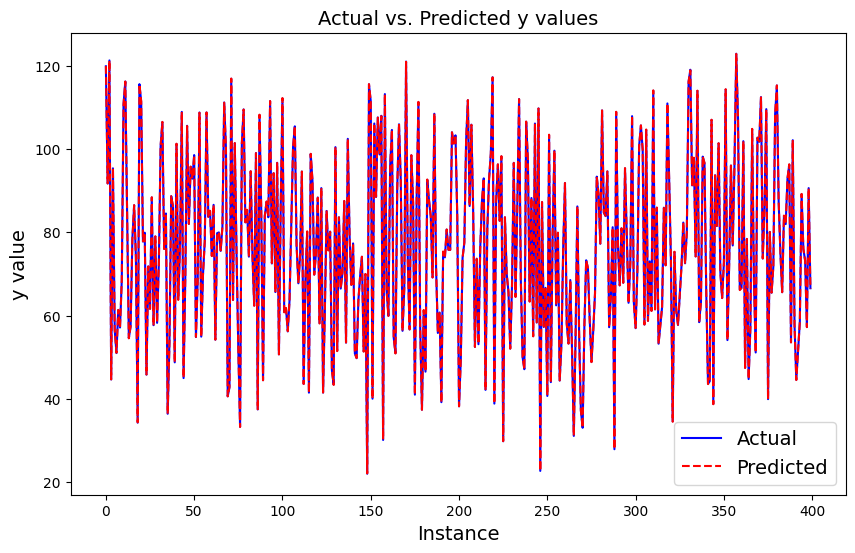

In [29]:
# new random input features for testing
m_test = 400  # number of test instances
x_test = 2 * np.random.rand(m_test, 1)
w_test = 2 * np.random.rand(m_test, 1)
y_feature_test = 2 * np.random.rand(m_test, 1)
z_test = 2 * np.random.rand(m_test, 1)
a_test = 2 * np.random.rand(m_test, 1)
b_test = 2 * np.random.rand(m_test, 1)
c_test = 2 * np.random.rand(m_test, 1)
d_test = 2 * np.random.rand(m_test, 1)

# actual y values
y_actual = 4 + 3*x_test + 2*w_test + 5*y_feature_test + 9*z_test + 14*a_test + 34*b_test + 3*c_test + d_test

# make vertical test matrix horizontal
X_test = np.hstack([x_test, w_test, y_feature_test, z_test, a_test, b_test, c_test, d_test])

# use our model to predict on test data
y_predicted = lin_reg.predict(X_test)

# visualizing predicted vs actual
plt.figure(figsize=(10, 6))
plt.plot(y_actual, 'b-', label='Actual')
plt.plot(y_predicted, 'r--', label='Predicted')
plt.xlabel('Instance')
plt.ylabel('y value')
plt.title('Actual vs. Predicted y values')
plt.legend()
plt.show()


This worked a lot better than i expected. I think we'd have to probably look at the MSE to make sure it's really being minimized. Also, try playing around with the m value. Notice that if we use a really large m, our errors will decrease a lot.